In [24]:
import pandas as pd
import numpy as np
from pylab import get_cmap

df_num = pd.read_pickle("preprocessed")
df_num.head()

,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
0,0.109589,0.144430,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.287671,0.051677,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0.150685,0.219011,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0.369863,0.099418,0.076881,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.232877,0.125398,0.000000,0.0,0.295918,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
    
pca = PCA(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0, perplexity=50) # Ici 30 semble mieux que 50.

df_pca_2d = pca.fit_transform(df_num)
df_tsne_2d = tsne.fit_transform(df_num)

ModuleNotFoundError: No module named 'sklearn'

In [4]:
df_sampled = df_num.sample(n=2000)
df_sampled.head()

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def drawData(X_scores, color_column, titre="2D Viz", legend_loc = "upper right"):
    x_max = X_scores[:, 0].max()
    x_min = X_scores[:, 0].min()
    y_max = X_scores[:, 1].max()
    y_min = X_scores[:, 1].min()
    
    len_x = x_max - x_min
    len_y = y_max - y_min

#     xx, yy = np.meshgrid(np.linspace(x_min - len_x / 10, x_max + len_x / 10, 50), 
#                      np.linspace(y_min - len_y, y_max + len_y, 50))
#     Z = ilf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

    plt.title(titre)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    
    color_class = color_column.unique()
    color_num = color_class.size
    print(color_num)
    cm = get_cmap('gist_rainbow')
    cgen = (cm(1.*i/color_num) for i in range(color_num))
    
    plt.scatter(X_scores[:, 0], X_scores[:, 1], c=color_column)
    
#     for i, color in enumerate(cgen):
#         plt.scatter(X_scores[:, 0][color_column == color_class[i]], X_scores[:, 1][color_column == color_class[i]], c=color,
#                  s=20, edgecolor='k')
    
    plt.axis('tight')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#    plt.legend([TN, TP, FN, FP], ["True negative", "True positive", "False negative", "False positive"], loc=legend_loc)

In [11]:
# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_var = Input(shape=(64,))

# encoder layers
encoded = Dense(10, activation='relu')(input_var)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_var, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input_var, output=encoder_output)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [12]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(df_sampled, df_sampled,
                nb_epoch=10,
                batch_size=10,
                shuffle=True)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.0943
Epoch 2/10
2000/2000 [==============================] - 1s 417us/step - loss: 0.0683
Epoch 3/10
2000/2000 [==============================] - 1s 420us/step - loss: 0.0610
Epoch 4/10
2000/2000 [==============================] - 1s 424us/step - loss: 0.0563
Epoch 5/10
2000/2000 [==============================] - 1s 394us/step - loss: 0.0538
Epoch 6/10
2000/2000 [==============================] - 1s 366us/step - loss: 0.0521
Epoch 7/10
2000/2000 [==============================] - 1s 360us/step - loss: 0.0514
Epoch 8/10
2000/2000 [==============================] - 1s 362us/step - loss: 0.0509
Epoch 9/10
2000/2000 [==============================] - 1s 363us/step - loss: 0.0504
Epoch 10/10
2000/2000 [==============================] - 1s 364us/step - loss: 0.0499


In [17]:
from keras import regularizers

# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_var = Input(shape=(64,))

# encoder layers
encoded2 = Dense(10, activation='relu', activity_regularizer = regularizers.l1(10e-4))(input_var)
encoder_output2 = Dense(encoding_dim)(encoded2)

# decoder layers
decoded2 = Dense(10, activation='relu')(encoder_output2)
decoded2 = Dense(64, activation='tanh')(decoded2)

# construct the autoencoder model
autoencoder2 = Model(input=input_var, output=decoded2)

# construct the encoder model for plotting
encoder2 = Model(input=input_var, output=encoder_output2)

autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(df_sampled, df_sampled,
                nb_epoch=20,
                batch_size=10,
                shuffle=True)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
2000/2000 [==============================] - 1s 464us/step - loss: 0.1075
Epoch 2/20
2000/2000 [==============================] - 1s 379us/step - loss: 0.0755
Epoch 3/20
2000/2000 [==============================] - 1s 377us/step - loss: 0.0730
Epoch 4/20
2000/2000 [==============================] - 1s 381us/step - loss: 0.0725
Epoch 5/20
2000/2000 [==============================] - 1s 383us/step - loss: 0.0710
Epoch 6/20
2000/2000 [==============================] - 1s 380us/step - loss: 0.0667
Epoch 7/20
2000/2000 [==============================] - 1s 378us/step - loss: 0.0634
Epoch 8/20
2000/2000 [==============================] - 1s 378us/step - loss: 0.0617
Epoch 9/20
2000/2000 [==============================] - 1s 377us/step - loss: 0.0608
Epoch 10/20
2000/2000 [==============================] - 1s 382us/step - loss: 0.0603
Epoch 11/20
2000/2000 [==============================] - 1s 378us/step - loss: 0.0599
Epoch 12/20
2000/2000 [==============================] - 1s 385

2


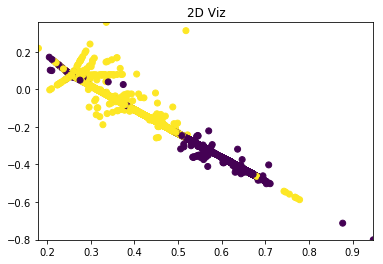

In [32]:
df_encoded2 = encoder2.predict(df_num, batch_size = 20)

drawData(df_encoded2, df_num["salary_<=50K"])

ModuleNotFoundError: No module named 'sklearn'